<a href="https://colab.research.google.com/github/Starboy177/DataScience/blob/main/JasoHasiU4proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U3proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU3proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

# Unit 4 Project: Using Hierarchies to Account for Dependence Between Groups

**Task**:

Two parts:

1. Propose a data set that's compatible with a hierarchical model structure built with pymc, and that potentially has some dependence between subgroups within the data set. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a model using pymc within the colab environment, on a data set of your choice, with the following restrictions
- You must have at least one piror and at least one hyperprior.
- Your model must have at least one seperate prior for each subgroup of the data set, and a at least one shared hyperior for all the groups.
- Any student may use the following data set: [basketball2324](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). I recommend trying to model TRB (total rebounds) by player position (pos). Also, I recommend pandas query function to splice and clean the data.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough. There is an execption to this rule for unit 4: [NBA player data from the 2023-2024 season](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). Other seasons are allowed as well.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- All students are allowed to use this data set: [NBA player data from the 2023-2024 season](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). Why? This is could lead to similar analysis as the soccer data analysis--basically, I think this data set will work well with the models we ran in class. Let me know if you have questions about downloading and cleaning the data.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit4NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- I didn't totally understand the chemical shift context--which means you don't have to totally understand the context of your data either! You should try to learn as you go, though.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm

In [2]:
#raw basketball data
url_bb = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
bb_data = pd.read_csv(url_bb,dtype={'Pos':'category'})
#extracts only needed data from original data set
bb_data = bb_data[['Player','Pos','BLK']]
#displays data table
bb_data

,Player,Pos,BLK
0,Precious Achiuwa,PF-C,68
1,Bam Adebayo,C,66
2,Ochai Agbaji,SG,44
3,Santi Aldama,PF,54
4,Nickeil Alexander-Walker,SG,42
...,...,...,...
567,Thaddeus Young,PF,5
568,Trae Young,PG,11
569,Omer Yurtseven,C,18
570,Cody Zeller,C,5


<Axes: ylabel='BLK'>

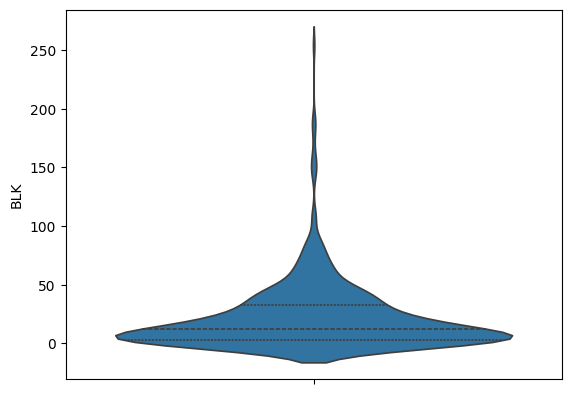

In [3]:
#plotting data
sns.violinplot(bb_data.BLK,inner='quart')

In [4]:
pos_idx = bb_data.Pos.cat.codes.values
pos_codes = bb_data.Pos.cat.categories
bb_coords = {'pos': pos_codes}

In [8]:
with pm.Model(coords = bb_coords) as bb_model:

    a = pm.Gamma('a', alpha = 1, beta = 1)
    b = pm.Gamma('b', alpha = 1, beta = 1)


    λ = pm.Gamma('λ', alpha = a, beta = b)


    _ = pm.Exponential('trb', lam = λ, observed = bb_data.BLK.values)


    idata_bb = pm.sample(target_accept = 0.95)

Output()

Output()

Output()

(0.0, 300.0)

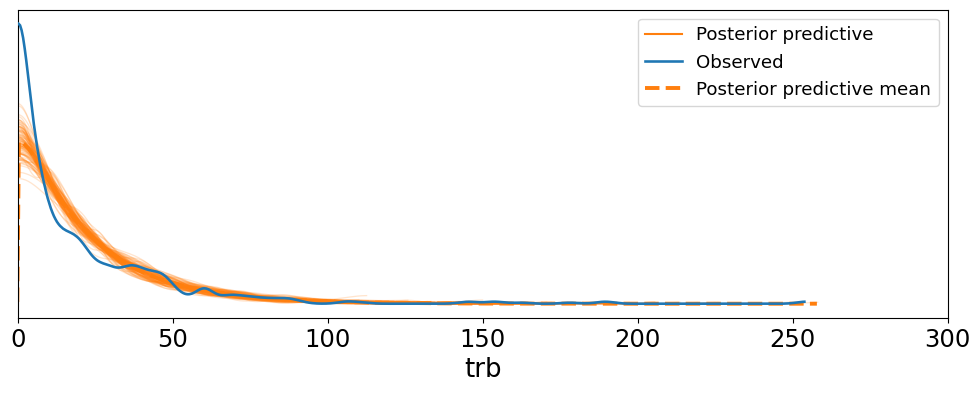

In [12]:
pm.sample_posterior_predictive(idata_bb, model=bb_model, extend_inferencedata=True)
ax = az.plot_ppc(idata_bb, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
ax.set_xlim(0, 300)


The model fits the data pretty well, so I'm just gonna keep it as is.

In [13]:
#breaking up posterior by position
with pm.Model(coords = bb_coords) as bb_model:

    a = pm.Gamma('a', alpha = 1, beta = 1)
    b = pm.Gamma('b', alpha = 1, beta = 1)


    λ = pm.Gamma('λ', alpha = a, beta = b, dims = "pos")


    _ = pm.Exponential('trb', lam = λ[pos_idx], observed = bb_data.BLK.values)


    idata_bb = pm.sample(target_accept = 0.95)

Output()

Output()

(0.0, 0.015)

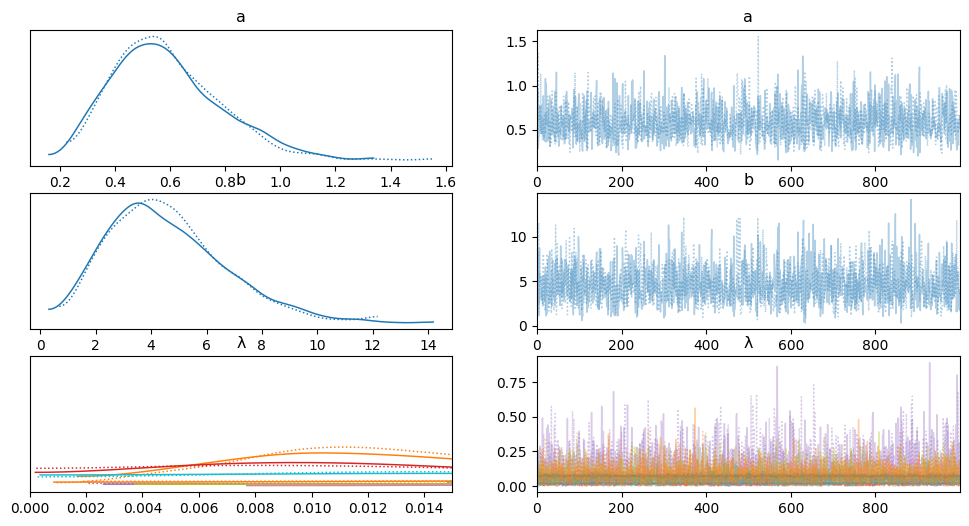

In [15]:
az.plot_trace(idata_bb)[2,0].set_xlim([0, .015])

In [16]:
az.rhat(idata_bb)

<xarray.Dataset> Size: 352B
Dimensions:  (pos: 12)
Coordinates:
  * pos      (pos) <U5 240B 'C' 'C-PF' 'PF' 'PF-C' ... 'SF-SG' 'SG' 'SG-PG'
Data variables:
    a        float64 8B 1.0
    b        float64 8B 1.001
    λ        (pos) float64 96B 1.001 1.006 1.0 0.9999 ... 1.002 0.9995 0.9996

array([<Axes: >], dtype=object)

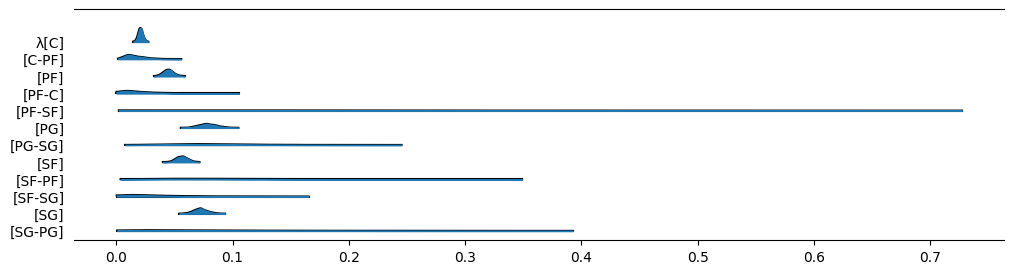

In [17]:
az.plot_forest(idata_bb, var_names=['λ'], combined=True, figsize=(12, 3), kind = 'ridgeplot', hdi_prob=0.998)

In [18]:
posterior = idata_bb.posterior
lambda_variable = posterior['λ']
mean_lambda = lambda_variable.mean(dim=['chain', 'draw'])
mean_array = mean_lambda.values

#calculating the reciprocal
reciprocal_array = []
for value in mean_array:
    reciprocal = 1 / value
    reciprocal_array.append(reciprocal)

for i in range(len(pos_codes)):
    position = pos_codes[i]
    reciprocal = reciprocal_array[i]
    print(f'{position}: {reciprocal}')

C: 47.8722673541159
C-PF: 61.80698583088583
PF: 22.28335102148917
PF-C: 46.3896488157798
PF-SF: 6.510085682432871
PG: 12.68331619177013
PG-SG: 12.267835936625545
SF: 17.684844313902794
SF-PF: 10.650594994259507
SF-SG: 29.692478786459773
SG: 13.781808527787453
SG-PG: 12.512135339177956


<BarContainer object of 12 artists>

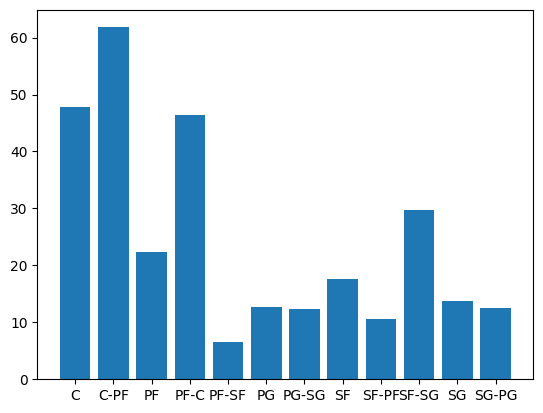

In [19]:
#bar chart of stats per postition
plt.bar(pos_codes, reciprocal_array)

It is pretty clear from the data that centers are and power forwards get the most blocks of any position, with centers having the most by quite a bit. It should be noted that this is likely due to their proximity to the basket as they are usually tasked with guarding the rim. These players are also typically the tallest players on the court.